# Prediksi dan Clustering Polusi Udara di Jakarta

## Dataset

| Kolom | Deskripsi |
|--------|-------------|
| `tanggal` | Tanggal pengambilan kualitas udara (YYYY-MM-DD) |
| `stasiun` | Stasiun pemantauan kualitas udara |
| `pm10` | Konsentrasi partikel udara yang berdiameter kurang dari 10 mikrometer (µg/m³) |
| `so2` | Konsentrasi sulfur dioksida di udara (µg/m³) |
| `co` | Konsentrasi karbon monoksida di udara (µg/m³) |
| `o3` | Konsentrasi ozon di permukaan tanah (µg/m³) |
| `no2` | Konsentrasi nitrogen dioksida di udara (µg/m³) | 
| `max` | Nilai maksimum dari konsentrasi polutan |
| `critical` | Polutan yang mencapai nilai maksimum |
| `categori` | Kategori kualitas udara berdasarkan konsentrasi polutan yang ada |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./indeks-standar-pencemar-udara-di-spku-dataset.csv')
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK


In [4]:
df.shape

(1830, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1830 non-null   object 
 1   stasiun   1830 non-null   object 
 2   pm10      1830 non-null   object 
 3   so2       1830 non-null   object 
 4   co        1830 non-null   object 
 5   o3        1830 non-null   object 
 6   no2       1830 non-null   object 
 7   max       1826 non-null   float64
 8   critical  1814 non-null   object 
 9   categori  1830 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.1+ KB


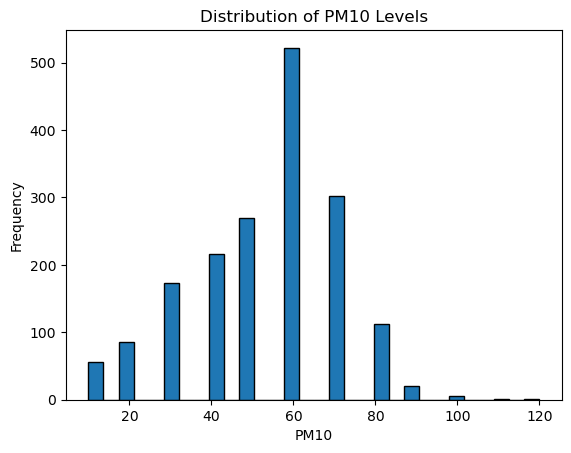

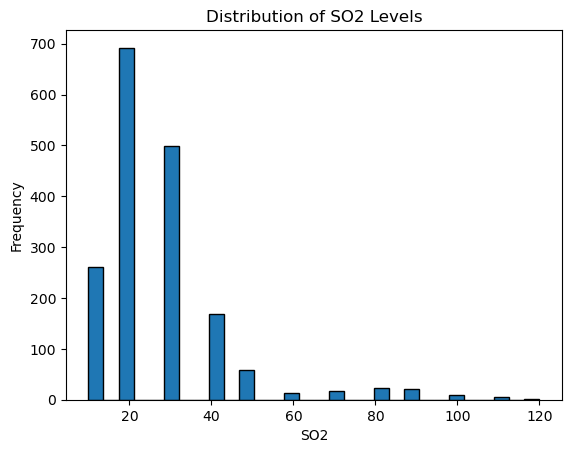

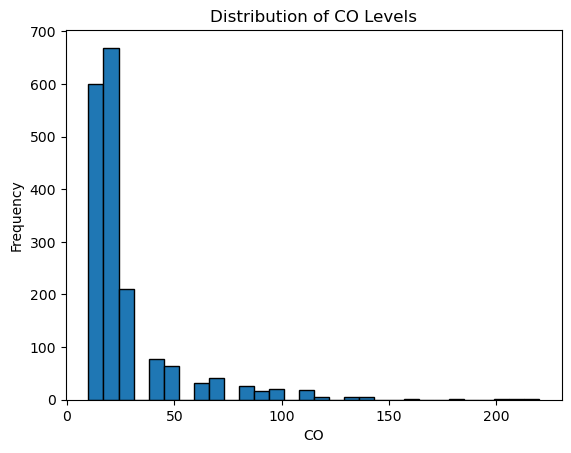

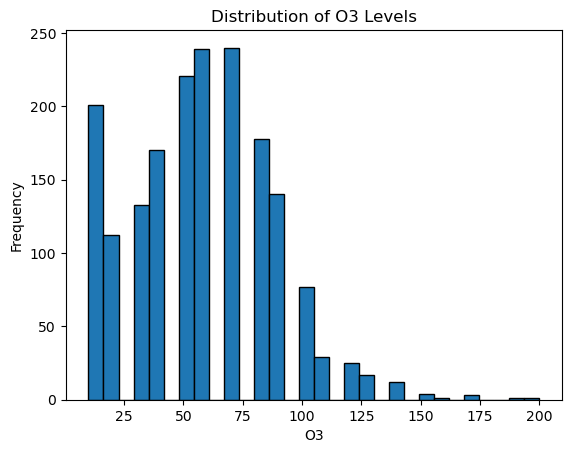

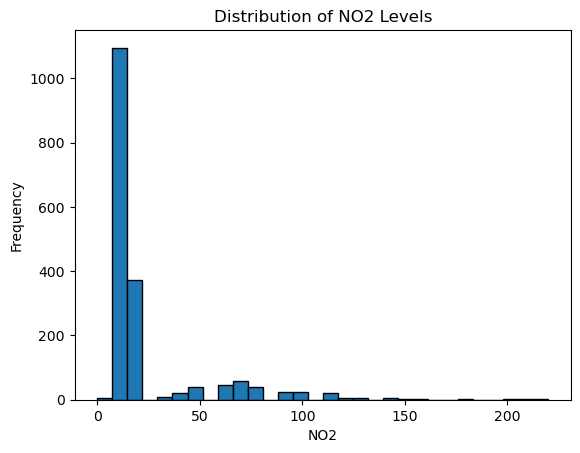

In [11]:
import matplotlib.pyplot as plt

# List of pollutants to visualize
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']
#df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')

# Loop through each pollutant and create a histogram
for pollutant in pollutants:
    df[pollutant] = pd.to_numeric(df[pollutant], errors='coerce')
    group_val = ((df[pollutant] - 1) // 10+1) *10
    plt.hist(group_val, bins=30, edgecolor='black')
    plt.title(f'Distribution of {pollutant.upper()} Levels')
    plt.xlabel(pollutant.upper())
    plt.ylabel('Frequency')
    plt.show()


In [13]:
from collections import Counter

pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']
decile = lambda pollution : pollution // 10 * 10
df[pollutants] = pd.to_numeric(df[pollutants], errors='coerce')
histo = Counter(decile(poll_val) for poll_val in df[pollutants])

print(histo)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [14]:
print(df[pollutants])

      pm10   so2    co    o3   no2
0     30.0  20.0  10.0  32.0   9.0
1     27.0  22.0  12.0  29.0   8.0
2     39.0  22.0  14.0  32.0  10.0
3     34.0  22.0  14.0  38.0  10.0
4     35.0  22.0  12.0  31.0   9.0
...    ...   ...   ...   ...   ...
1825  18.0  32.0   4.0  41.0   NaN
1826  22.0  33.0   5.0  35.0   3.0
1827  15.0  28.0   4.0  27.0   NaN
1828  16.0   7.0   3.0  21.0   2.0
1829  18.0  13.0   6.0  24.0   3.0

[1830 rows x 5 columns]


In [15]:
df[pollutants].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    1764 non-null   float64
 1   so2     1771 non-null   float64
 2   co      1800 non-null   float64
 3   o3      1804 non-null   float64
 4   no2     1778 non-null   float64
dtypes: float64(5)
memory usage: 71.6 KB
